## Setting up an Environment

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/masks/user.png
/kaggle/input/masks/upvote.png
/kaggle/input/masks/star.png
/kaggle/input/masks/comment.png
/kaggle/input/masks/loc.png
/kaggle/input/masks/masks-wordclouds/user.png
/kaggle/input/masks/masks-wordclouds/upvote.png
/kaggle/input/masks/masks-wordclouds/star.png
/kaggle/input/masks/masks-wordclouds/comment.png
/kaggle/input/masks/masks-wordclouds/loc.png
/kaggle/input/ca-independent-medical-review/Independent_Medical_Review__IMR__Determinations__Trend.csv


## Reading the file and checking first five rows

In [2]:
df = pd.read_csv("/kaggle/input/ca-independent-medical-review/Independent_Medical_Review__IMR__Determinations__Trend.csv")
df.head()

,Reference ID,Report Year,Diagnosis Category,Diagnosis Sub Category,Treatment Category,Treatment Sub Category,Determination,Type,Age Range,Patient Gender,Findings
0,MN16-22639,2016,Infectious,Hepatitis,Pharmacy/Prescription Drugs,Anti-virals,Overturned Decision of Health Plan,Medical Necessity,41-50,Male,Nature of Statutory Criteria/Case Summary: An ...
1,MN16-22638,2016,Mental,Eating Disorder,Mental Health Treatment,Residential Treatment Center - Admission,Upheld Decision of Health Plan,Medical Necessity,21-30,Female,Nature of Statutory Criteria/Case Summary: An...
2,MN16-22637,2016,Autism Spectrum,Autism-PDD-NOS,Autism Related Treatment,Speech Therapy,Upheld Decision of Health Plan,Medical Necessity,0-10,Female,Nature of Statutory Criteria/Case Summary: Th...
3,EI16-22636,2016,Prevention/Good Health,NaN,"Diagnostic Imaging, Screening and Testing",Mammography,Overturned Decision of Health Plan,Experimental/Investigational,65+,Female,Nature of Statutory Criteria/Case Summary: An ...
4,EI06-5319,2006,Cardiac/Circulatory,NaN,Cardio Vascular,NaN,Upheld Decision of Health Plan,Experimental/Investigational,51-64,Male,Physician 1: The patient is a 62-year-old male...


## Checking dimensions

In [3]:
df.shape

(19245, 11)

## Checking column names

In [4]:
df.columns.values

array(['Reference ID', 'Report Year', 'Diagnosis Category',
       'Diagnosis Sub Category', 'Treatment Category',
       'Treatment Sub Category', 'Determination', 'Type', 'Age Range',
       'Patient Gender', 'Findings'], dtype=object)

## Checking missing values

<AxesSubplot:>

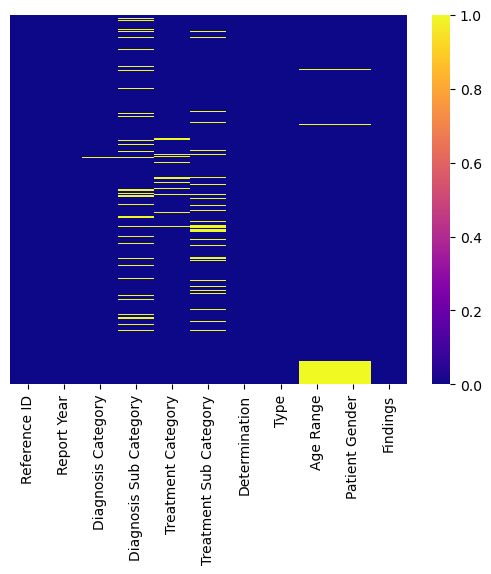

In [5]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=True,cmap = 'plasma',yticklabels=False)

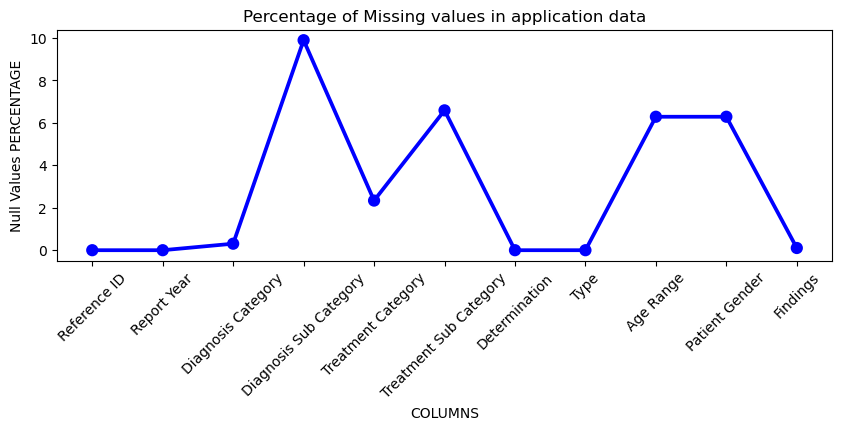

In [6]:
import matplotlib.pyplot as plt

null_df = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_df.columns = ['column_name' , 'null_value_percentage']

fig = plt.figure(figsize=(10,3))
ax = sns.pointplot(x="column_name" , y="null_value_percentage" , data = null_df , color="blue")
plt.xticks(rotation=45,fontsize=10)
# ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

Point to note where we have rows empty for age range, there is no Patient Gender information available.

## Checking data types of each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19245 entries, 0 to 19244
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reference ID            19245 non-null  object
 1   Report Year             19245 non-null  int64 
 2   Diagnosis Category      19186 non-null  object
 3   Diagnosis Sub Category  17341 non-null  object
 4   Treatment Category      18795 non-null  object
 5   Treatment Sub Category  17977 non-null  object
 6   Determination           19245 non-null  object
 7   Type                    19245 non-null  object
 8   Age Range               18035 non-null  object
 9   Patient Gender          18035 non-null  object
 10  Findings                19225 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.6+ MB


## Visualizing bar chart for each categorical feature.

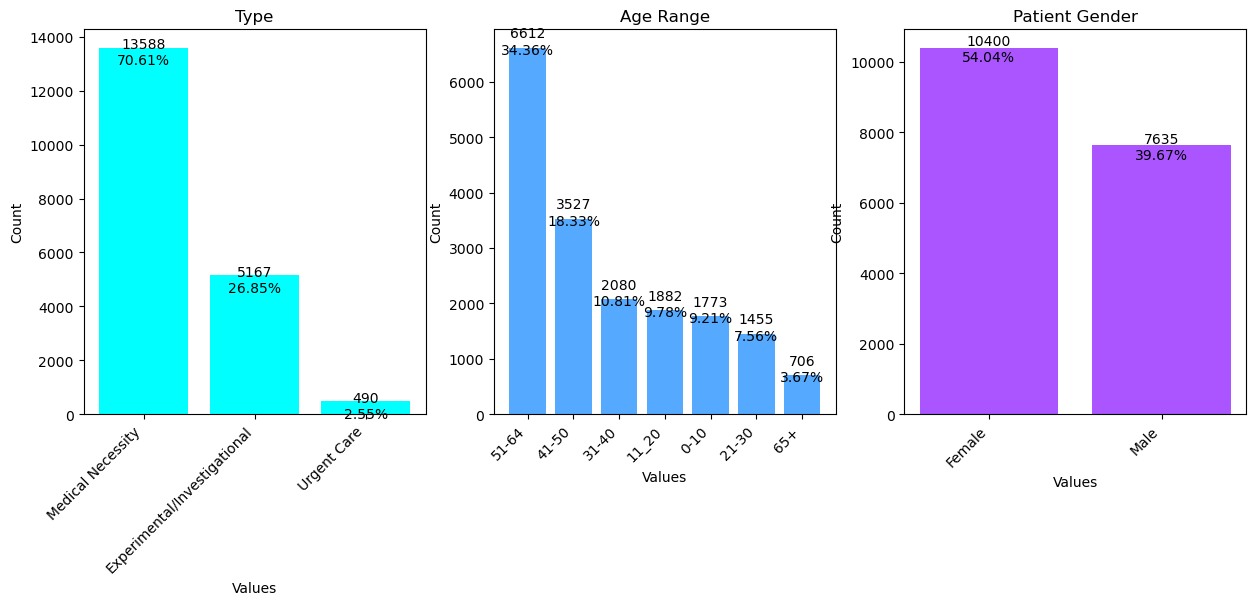

In [8]:
#Listing all categorical_columns
cc = ["Type","Age Range",
     "Patient Gender"] 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

cmap = plt.cm.get_cmap('cool')
# Loop through each column
for i, col in enumerate(cc):
    # Group the data by the column and count the number of occurrences of each value
    counts = df[col].value_counts()
    # Compute the total number of rows
    total_rows = len(df)
    # Compute the percentage of rows for each value
    percent = counts / total_rows * 100
    # Create a bar chart in the corresponding subplot
    axs[i].bar(counts.index, counts.values, color=cmap(i/len(cc)))
    # Set the title and axis labels
    axs[i].set_title(col)
    axs[i].set_xlabel('Values')
    axs[i].set_ylabel('Count')
    # Tilt the x-axis labels by 45 degrees
    plt.setp(axs[i].get_xticklabels(), rotation=45, ha='right')
    # Add annotations for each bar
    for j, count in enumerate(counts):
        pct = percent[j]
        axs[i].text(counts.index[j], count + 0.02 * total_rows, f'{count}\n{pct:.2f}%', ha='center', va='top')

# Show the chart
plt.show()


## WordCloud on Findings

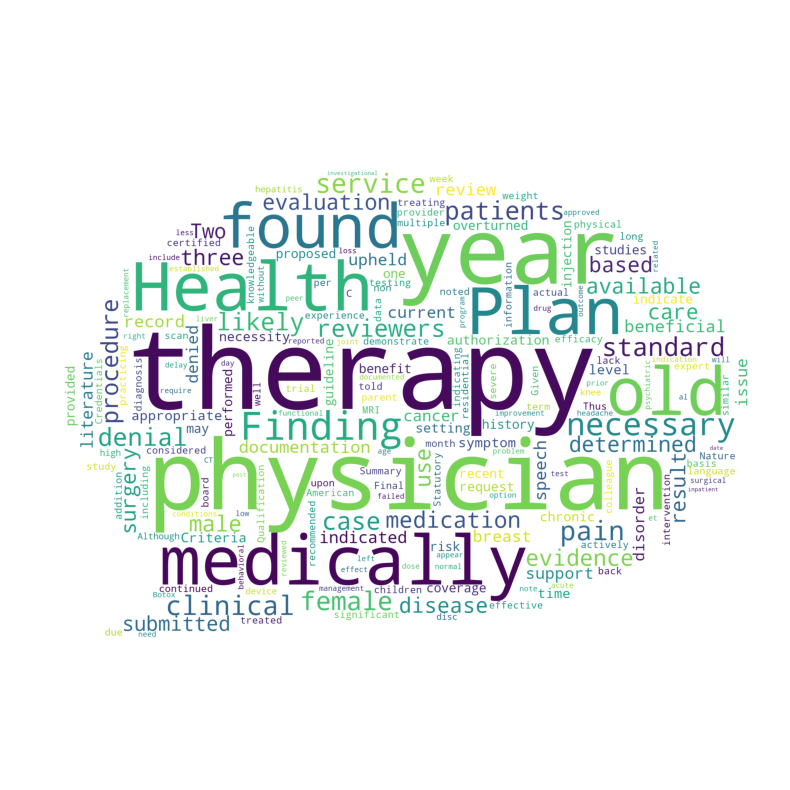

In [9]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
background = np.array(Image.open('/kaggle/input/masks/comment.png'))
word_string=' '.join(df['Findings'].astype("str").values)
STOPWORDS.update(['patient',"treatment","reviewer","requested",
                  "condition","medical","enrollee","s"])
wordcloud = WordCloud(stopwords=STOPWORDS, 
                      collocations=False,
                      background_color ='white',
                      min_font_size = 0.01,
                      mask=background).generate(word_string)
plt.subplots(figsize=(10,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Gender Distribution 

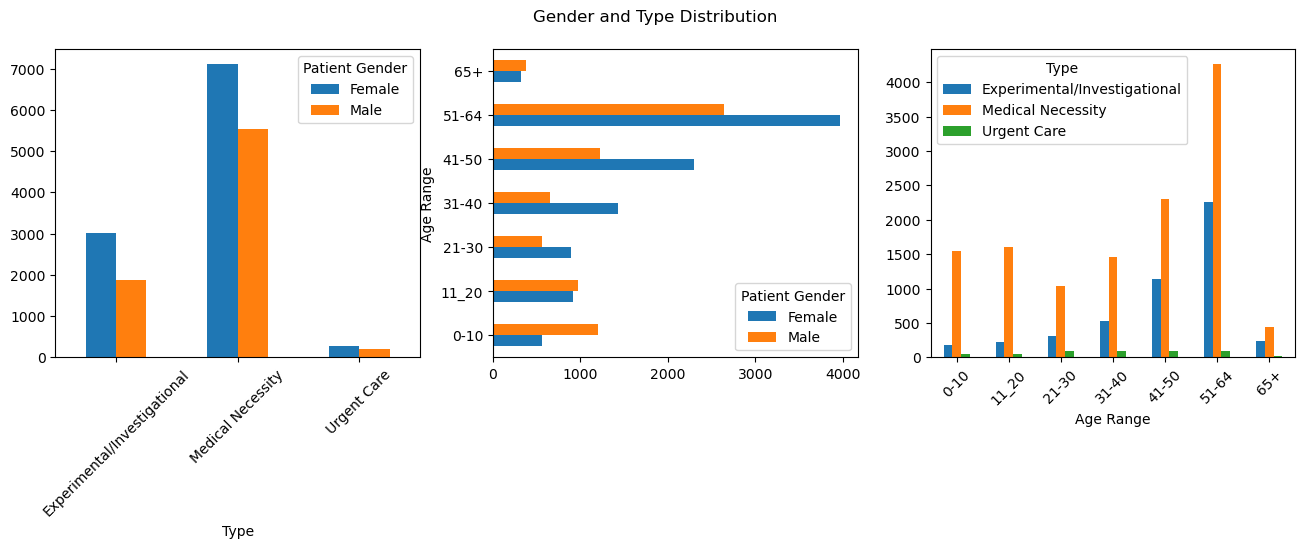

In [10]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(16,4)

fig.suptitle('Gender and Type Distribution')

d = df.groupby([ 'Type','Patient Gender']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0],rot=45,fontsize=10)

d = df.groupby(['Age Range','Patient Gender']).size()
p = d.unstack(level=1).plot(kind='barh', ax=ax[1],fontsize=10)

d = df.groupby(['Age Range','Type',]).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2],rot=45,fontsize=10)